In [1]:
import pandas as pd
## plotting libraries
from matplotlib import pyplot as plt
## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
df= pd.read_csv("DATA_Customer-Churn.csv")

In [3]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [13]:
pd.to_numeric(df["TotalCharges"], downcast='float',errors= "coerce")

0         29.850000
1       1889.500000
2        108.150002
3       1840.750000
4        151.649994
           ...     
7038    1990.500000
7039    7362.899902
7040     346.450012
7041     306.600006
7042    6844.500000
Name: TotalCharges, Length: 7043, dtype: float32

### Check for null values in the dataframe. Replace the null values.

In [14]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [15]:
df.isnull().any().value_counts()

False    16
dtype: int64

In [18]:
df["gender"].isnull().any().sum()

0

### Defining a new data

In [ ]:
columns

In [23]:
df01= pd.DataFrame(df[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges","Churn"]])

In [24]:
df01

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.5,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes
...,...,...,...,...,...
7038,24,0,84.80,1990.5,No
7039,72,0,103.20,7362.9,No
7040,11,0,29.60,346.45,No
7041,4,1,74.40,306.6,Yes


### From categorical to numerical

In [28]:
df01["Churn"] = df01["Churn"].apply(lambda x: x.replace('No', '0') if type(x) == str else x)
df01["Churn"] = df01["Churn"].apply(lambda x: x.replace('Yes', '1') if type(x) == str else x)

In [76]:
df01['Churn']=df01['Churn'].astype(int) 

In [87]:
df01["TotalCharges"]=df01['TotalCharges'].astype(float) 

In [88]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   Churn           7043 non-null   int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 247.7 KB


### Unbalenced data

In [106]:
df01['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [89]:
df01

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,0.0,0
1,34,0,56.95,0.0,0
2,2,0,53.85,1.0,1
3,45,0,42.30,0.0,0
4,2,0,70.70,1.0,1
...,...,...,...,...,...
7038,24,0,84.80,0.0,0
7039,72,0,103.20,0.0,0
7040,11,0,29.60,0.0,0
7041,4,1,74.40,1.0,1


In [95]:
df01.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
TotalCharges      float64
Churn               int32
dtype: object

In [96]:
X= df01[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges"]]
y=df01[["Churn"]]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

### Scaler

In [107]:
from sklearn.preprocessing import MinMaxScaler


In [108]:
scaler = MinMaxScaler()
scaler.fit(X_train)


X_scaler_train= scaler.transform(X_train)

X_scaler_test= scaler.transform(X_test)

### Logistic Model

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [124]:
log_model = LogisticRegression() 


#trans = PowerTransformer()

trans.fit(X_train)

#X_train_mod = trans.transform(X_train)
#X_test_mod  = trans.transform(X_test)

log_model.fit(X_train, y_train)


y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


C:\Users\espan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,1.00,1.00
1,Precision,1.00,1.00
2,Recall,1.00,1.00


log_model = LogisticRegression() 

log_model.fit(X_train, y_train)


y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

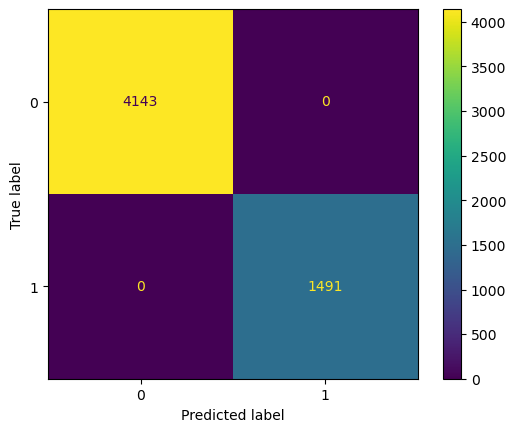

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train,y_train, labels = log_model.classes_)

disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

### KNN Classification

In [128]:
df02 = pd.DataFrame(df01)

In [129]:
df02

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,0.00,0
1,34,0,56.95,0.00,0
2,2,0,53.85,1.00,1
3,45,0,42.30,0.00,0
4,2,0,70.70,1.00,1
...,...,...,...,...,...
7038,24,0,84.80,0.00,0
7039,72,0,103.20,0.00,0
7040,11,0,29.60,0.00,0
7041,4,1,74.40,1.00,1


In [130]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.20, random_state=11)

In [131]:
scaler = MinMaxScaler()
scaler.fit(X_train_knn)


X_scaler_train_knn= scaler.transform(X_train_knn)

X_scaler_test_knn= scaler.transform(X_test_knn)

In [137]:
model = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model

model.fit(X_train_knn, y_train_knn) # train model


y_pred_knn = model.predict(X_test_knn) # predict test
y_pred_train_knn=model.predict(X_train_knn) # predict train (for sanity checks)
#model.predict_proba(inputdata)





C:\Users\espan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,Error_metric,Train,Test
0,Accuracy,0.95,0.90
1,Precision,0.96,0.87
2,Recall,0.86,0.73


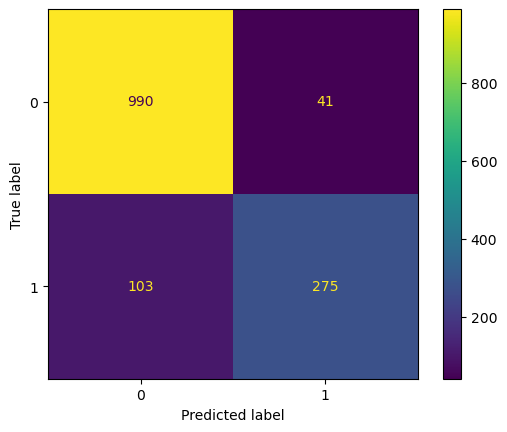

In [139]:
cm = confusion_matrix(y_test_knn, y_pred_knn, labels = model.classes_)

disp = ConfusionMatrixDisplay(cm)
disp.plot()


performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_knn, y_pred_train_knn),
                                         precision_score(y_train_knn, y_pred_train_knn),
                                         recall_score(y_train_knn, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_knn),
                                        precision_score(y_test, y_pred_knn),
                                        recall_score(y_test, y_pred_knn)]})

display(performance_log)

In [140]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize an empty list to store the classification reports
reports = []

# Iterate over the range of n_neighbors
for n in range(1, 21):
    # Create the KNN classifier model
    model = KNeighborsClassifier(n_neighbors=n, weights='uniform')

    # Train the model
    model.fit(X_train_knn, y_train_knn)

    # Predict the test data
    y_pred_knn = model.predict(X_test_knn)

    # Generate the classification report
    report = classification_report(y_test_knn, y_pred_knn)

    # Append the classification report to the list
    reports.append((n, report))

# Display the classification reports for each n_neighbors value
for n, report in reports:
    print(f"n_neighbors = {n}\n{report}\n")


C:\Users\espan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\espan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\espan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\espan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

n_neighbors = 1
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1031
           1       0.90      0.80      0.85       378

    accuracy                           0.92      1409
   macro avg       0.92      0.89      0.90      1409
weighted avg       0.92      0.92      0.92      1409


n_neighbors = 2
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1031
           1       0.95      0.62      0.75       378

    accuracy                           0.89      1409
   macro avg       0.91      0.81      0.84      1409
weighted avg       0.90      0.89      0.88      1409


n_neighbors = 3
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1031
           1       0.87      0.73      0.79       378

    accuracy                           0.90      1409
   macro avg       0.89      0.84      0.86      1409
weighted avg       0.90 

C:\Users\espan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\espan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
